# Question 1

In [411]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import pandas as pd
from tqdm import tqdm, trange

### Create Dataset
<ol>
    <li>Sample a vector $X \in R_n$ where each $X_i \in U[0, 1]$. Each sample point ${X_i}$ is sampled from the uniform distribution</li>
    <li>Construct y using following equation: $Y = 3X^5 + 2X^2 + \epsilon$, where $\epsilon \in R_n$. Each $\epsilon_i$ is sampled independently from the N(0,0.5) (Normal distribution)</li>
    <li> Number of datapoints: 10000
</ol>

In [415]:
#Setting up random seed
np.random.seed(42)

In [417]:
n = 10000
X = np.random.uniform(0, 1, n)
ep = np.random.normal(0, np.sqrt(0.5), n)

Y = (3*(X**5)) + (2*(X**2)) + ep

print("First five values of X:", X[:5])
print("First five values of Y:", Y[:5])
print("First five values of ep:", ep[:5])

First five values of X: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
First five values of Y: [-0.74940527  3.34217171  1.97702842  0.1174139   0.83571223]
First five values of ep: [-1.0520771  -0.79562672  0.27493649 -0.83005379  0.78675126]


#### Train-Test split - 80:20

In [422]:
X = X.reshape(-1, 1)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

### Cross-Validation
<ul>
    <li>Split the training set into 5 parts and use the five folds to choose the optimal d.</li>
    <li>The loss function you would implement is the MSE error. You want to estimate the MSE error on each fold for a model that has been trained on the remaining 4 folds.</li>
    <li>The cross validation (CV) error for the training set would be the average MSE across all five folds.</li>
</ul>

In [426]:
def cross_validation_mse(X_train, Y_train, max_degree, k=5):
    mse_scores = []
    
    for d in range(1, max_degree + 1):
        fold_mse = []
        fold_errors = []
        
        order = np.random.permutation(n)
        errors = []

        for i in range(k):
            test_indices = (order >= i * n // k) & (order < (i + 1) * n // k)
            train_indices = ~test_indices

            X_train_temp, X_test_temp = X[train_indices], X[test_indices]
            Y_train_temp, Y_test_temp = Y[train_indices], Y[test_indices]
            
            # Train the polynomial model
            poly = PolynomialFeatures(degree=d)
            # print(poly)
            X_train_poly = poly.fit_transform(X_train_temp)
            # print(X_train_poly)
            model = LinearRegression().fit(X_train_poly, Y_train_temp)
            
            # Compute MSE on the validation fold
            X_test_poly = poly.transform(X_test_temp)
            Y_test_pred = model.predict(X_test_poly)
            
            # fold_mse.append(mean_squared_error(Y_test_temp, Y_test_pred))
            mse = np.mean((Y_test_pred - Y_test_temp)**2)
            fold_errors.append(mse)
        
        # Average MSE across folds
        print(f"Polynomial Degree is: {d}")
        for j in range(k):
            print(f"MSE Error for fold {j+1} is : {fold_errors[j]}")
        mse_scores.append(np.mean(fold_errors))
    
    return mse_scores


max_degree = 10
cv_errors = cross_validation_mse(X_train, Y_train, max_degree)
for j in range(max_degree):
    print(f"Cross Validation MSE Error for polynomial degree {j+1} is : {cv_errors[j]}")

Polynomial Degree is: 1
MSE Error for fold 1 is : 0.8230384923292247
MSE Error for fold 2 is : 0.7890777267244
MSE Error for fold 3 is : 0.8152666473358448
MSE Error for fold 4 is : 0.8589588061834073
MSE Error for fold 5 is : 0.826366955878618
Polynomial Degree is: 2
MSE Error for fold 1 is : 0.5232259845040074
MSE Error for fold 2 is : 0.5302187307298682
MSE Error for fold 3 is : 0.5356815991509061
MSE Error for fold 4 is : 0.5394539311616645
MSE Error for fold 5 is : 0.5129587676069841
Polynomial Degree is: 3
MSE Error for fold 1 is : 0.5054239181204657
MSE Error for fold 2 is : 0.4780169099928496
MSE Error for fold 3 is : 0.5285900547657627
MSE Error for fold 4 is : 0.4869134529949882
MSE Error for fold 5 is : 0.5113070632184309
Polynomial Degree is: 4
MSE Error for fold 1 is : 0.47576023039341314
MSE Error for fold 2 is : 0.516446504711973
MSE Error for fold 3 is : 0.5057856619695356
MSE Error for fold 4 is : 0.49882333113874644
MSE Error for fold 5 is : 0.5044602745265613
Polynom

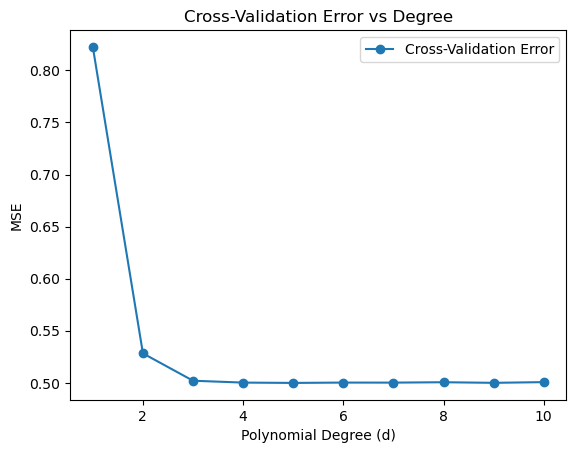

In [429]:
# Plot the CV error as a function of d for d ∈ [1, 2, . . . , 10]
plt.plot(range(1, max_degree + 1), cv_errors, marker='o', label='Cross-Validation Error')
plt.xlabel('Polynomial Degree (d)')
plt.ylabel('MSE')
plt.title('Cross-Validation Error vs Degree')
plt.legend()

In [432]:
# 4 In this subpart, use the entire training set for training the models.
# Compute the performance of the 10 models on the test set. 

train_errors = []
test_errors = []


for d in range(1, max_degree + 1):
    # Train the model on the entire training set
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    model = LinearRegression().fit(X_train_poly, Y_train)
    
    # Compute training MSE
    Y_train_pred = model.predict(X_train_poly)
    train_errors.append(mean_squared_error(Y_train, Y_train_pred))
    
    # Compute test MSE
    X_test_poly = poly.transform(X_test)
    Y_test_pred = model.predict(X_test_poly)
    test_errors.append(mean_squared_error(Y_test, Y_test_pred))

print(train_errors)
print(test_errors)

[0.8197449624090778, 0.5308868427492645, 0.5028442619238186, 0.4995386172610889, 0.49937819430249747, 0.49931240314076375, 0.49918638510390123, 0.49912497908114684, 0.4990325001190313, 0.4990215235860684]
[0.8317000337834024, 0.5169104626699393, 0.49718561775888426, 0.5011928513061346, 0.5005702540955568, 0.5006068139493652, 0.5008833946587745, 0.5008108438155788, 0.5010201633086672, 0.5009557607243771]


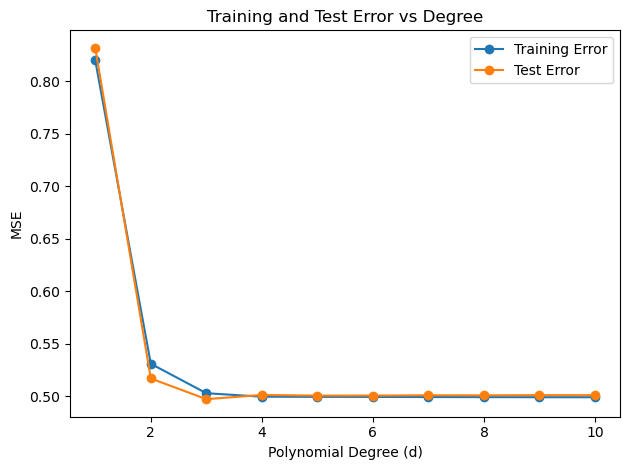

In [435]:
# 4 Plot the test MSE and training MSE as a function of d
plt.plot(range(1, max_degree + 1), train_errors, marker='o', label='Training Error')
plt.plot(range(1, max_degree + 1), test_errors, marker='o', label='Test Error')
plt.xlabel('Polynomial Degree (d)')
plt.ylabel('MSE')
plt.title('Training and Test Error vs Degree')
plt.legend()

plt.tight_layout()
plt.show()

In [438]:
optimal_d = np.argmin(cv_errors) + 1
print(f"The optimal degree based on cross-validation is d = {optimal_d}")

The optimal degree based on cross-validation is d = 5


### Our Observations:
<ul>
    <li>We see that from k-fold cross validation approach, we are seeing minimum mse scroes at d = 5.</li>
    <li>This makes sense because if we choose lower value of d, we might end up underfitting as for lower polynomial functions, we miss on capturing the true relationship</li>
    <li>On contrast, if we choose higher value of d, we might overfit the model and capture unnecessary noise. An optimal d balances out and is suggested to avoid both overfitting and underitting</li>
</ul>

# Question 2

In [443]:
# 1 For each of the simulated training dataset you generated,
# train 10 different models (d ∈ [1, . . . , 10]. ) Store and compute the prediction for x = 1.01

In [446]:
n = 100  # Number of data points per dataset
num_datasets = 1000  # Number of datasets
degrees = range(1, 11)  # Degrees of the polynomial models
x_test = 1.01  # New test point
true_function = lambda x: 3 * x**5 + 2 * x**2  # True function

bias_squared = []
variance = []
predictions_per_d = {d: [] for d in degrees} 


for i in trange(num_datasets):
   
    X_train = np.random.uniform(0, 1, n).reshape(-1, 1)
    epsilon = np.random.normal(0, np.sqrt(0.5), n)
    y_train = 3 * X_train**5 + 2 * X_train**2 + epsilon

    for d in degrees:
        poly = PolynomialFeatures(degree=d)
        X_poly_train = poly.fit_transform(X_train)
        model = LinearRegression()
        model.fit(X_poly_train, y_train)

        X_test_poly = poly.transform([[x_test]])
        prediction = model.predict(X_test_poly)[0][0]
        predictions_per_d[d].append(prediction)

100%|██████████| 1000/1000 [00:24<00:00, 40.11it/s]


In [448]:
# 2. Calculate the bias and variance of the prediction value. Plot the bias and variance as a function of d

In [452]:
true_value = true_function(x_test)
for d in tqdm(degrees):
    predictions = predictions_per_d[d]
    mean_prediction = np.mean(predictions)
    bias_squared.append((mean_prediction - true_value)**2)
    variance.append(np.var(predictions))

total_error = [b + v for b, v in zip(bias_squared, variance)]

100%|██████████| 10/10 [00:00<00:00, 3337.29it/s]


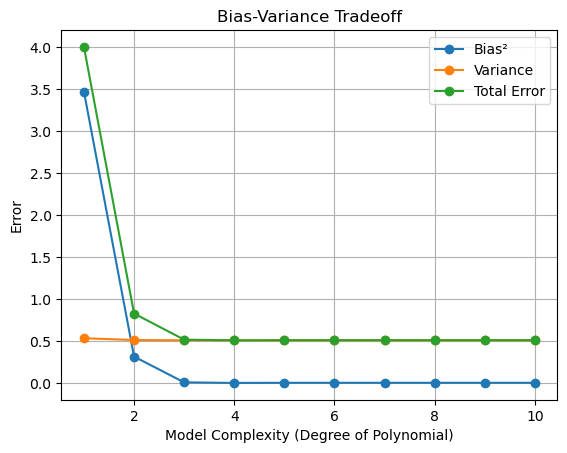

In [455]:
plt.plot(degrees, bias_squared, label="Bias²", marker='o')
plt.plot(degrees, variance, label="Variance", marker='o')
plt.plot(degrees, total_error, label="Total Error", marker='o')
plt.title("Bias-Variance Tradeoff")
plt.xlabel("Model Complexity (Degree of Polynomial)")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

In [458]:
df = pd.DataFrame({
    'Degree': degrees,
    'Bias^2': bias_squared,
    'Variance': variance,
    'Total Error': total_error})
df

,Degree,Bias^2,Variance,Total Error
0,1,3.469338,0.533427,4.002765
1,2,0.315304,0.512598,0.827902
2,3,0.008343,0.508679,0.517022
3,4,0.001641,0.507527,0.509168
4,5,0.003233,0.507306,0.510539
5,6,0.003233,0.507306,0.510539
6,7,0.003233,0.507306,0.510539
7,8,0.003233,0.507306,0.510539
8,9,0.003233,0.507306,0.510539
9,10,0.003233,0.507306,0.510539


<p>
    Initial Scenario, in this case, the bias decreases as the degree increases. At smaller degrees, bias is large indicating that simpler model fails to capture the function complexity. Variance remains more balanced in higher degrees. Total error seems to get stable around degree 5 (Neither overfitting, nor underfitting)
</p>

In [462]:
# 3. Consider the two cases below

In [465]:
n = 100  # Number of data points per dataset
num_datasets = 1000  # Number of datasets
degrees = range(1, 11)  # Degrees of the polynomial models
true_function = lambda x: 3 * x**5 + 2 * x**2  # True function

In [468]:
# a) Plot happens to bias and variance if we instead sample from Xi ∈ U [0, 10] instead
# X_i ∈ U[0, 10]

In [471]:
x_test_a = 1.01 
bias_squared_a = []
variance_a = []
predictions_per_d_a = {d: [] for d in degrees}

for i in trange(num_datasets):

    X_train_a = np.random.uniform(0, 10, n).reshape(-1, 1)
    epsilon = np.random.normal(0, np.sqrt(0.5), n)
    y_train_a = 3 * X_train_a**5 + 2 * X_train_a**2 + epsilon

    for d in degrees:
        poly = PolynomialFeatures(degree=d)
        X_poly_train = poly.fit_transform(X_train_a)
        model = LinearRegression()
        model.fit(X_poly_train, y_train_a)

        X_test_poly_a = poly.transform([[x_test_a]])
        prediction_a = model.predict(X_test_poly_a)[0][0]
        predictions_per_d_a[d].append(prediction_a)

100%|██████████| 1000/1000 [00:16<00:00, 60.13it/s]


100%|██████████| 10/10 [00:00<00:00, 3372.17it/s]


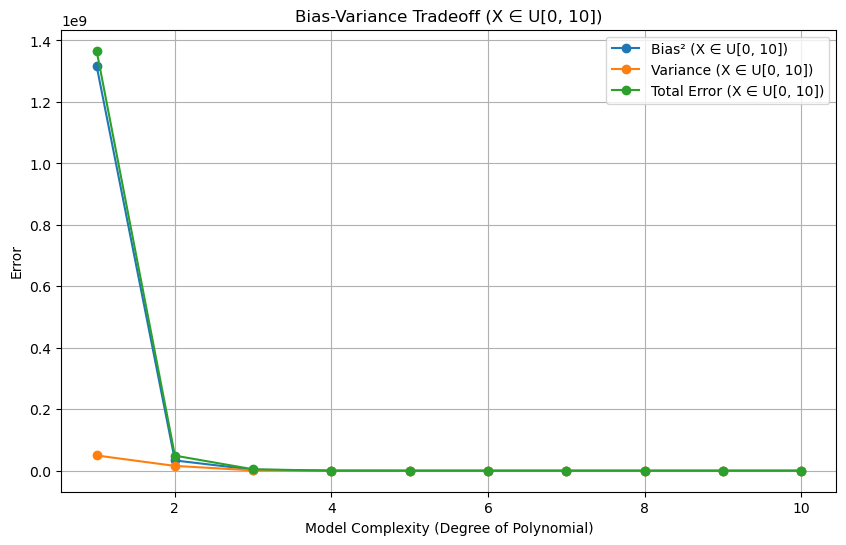

In [474]:
true_value_a = true_function(x_test_a)
for d in tqdm(degrees):
    predictions_a = predictions_per_d_a[d]
    mean_prediction_a = np.mean(predictions_a)
    bias_squared_a.append((mean_prediction_a - true_value_a)**2)
    variance_a.append(np.var(predictions_a))

total_error_a = [b + v for b, v in zip(bias_squared_a, variance_a)]

plt.figure(figsize=(10, 6))
plt.plot(degrees, bias_squared_a, label="Bias² (X ∈ U[0, 10])", marker='o')
plt.plot(degrees, variance_a, label="Variance (X ∈ U[0, 10])", marker='o')
plt.plot(degrees, total_error_a, label="Total Error (X ∈ U[0, 10])", marker='o')
plt.title("Bias-Variance Tradeoff (X ∈ U[0, 10])")
plt.xlabel("Model Complexity (Degree of Polynomial)")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

In [477]:
df_a = pd.DataFrame({
    'Degree': degrees,
    'Bias^2': bias_squared_a,
    'Variance': variance_a,
    'Total Error': total_error_a})
df_a

,Degree,Bias^2,Variance,Total Error
0,1,1.317035e+09,4.958550e+07,1.366620e+09
1,2,3.342743e+07,1.567758e+07,4.910500e+07
2,3,3.492734e+06,1.122362e+06,4.615096e+06
3,4,2.104719e+05,1.223862e+04,2.227105e+05
4,5,9.501462e-04,5.349732e-01,5.359233e-01
5,6,9.501462e-04,5.349732e-01,5.359233e-01
6,7,9.501462e-04,5.349732e-01,5.359233e-01
7,8,9.501462e-04,5.349732e-01,5.359233e-01
8,9,9.501462e-04,5.349732e-01,5.359233e-01
9,10,9.501462e-04,5.349732e-01,5.359233e-01


<p>
    In Xi ∈ U [0, 10] Scenario Bias decreases drastically as we move to higher degrees, and for degree = 0, bias is huge. This suggests that simpler models (lower degree) are not able to capture the patterns, as we are increasing the range of X Variance is higher at lower degrees, (degree 0 and 1), which says that  model is not able to generalize well. This is due to the wider input range and more complex relationships
</p>

In [481]:
# b) Plot what happens to bias and variance if we instead use test point x = -0.5 ?
# x_test = -0.5

In [484]:
x_test_b = -0.5  
bias_squared_b = []
variance_b = []
predictions_per_d_b = {d: [] for d in degrees}

for i in trange(num_datasets):
  
    X_train_b = np.random.uniform(0, 1, n).reshape(-1, 1)
    epsilon = np.random.normal(0, np.sqrt(0.5), n)
    y_train_b = 3 * X_train_b**5 + 2 * X_train_b**2 + epsilon

    for d in degrees:
        poly = PolynomialFeatures(degree=d)
        X_poly_train = poly.fit_transform(X_train_b)
        model = LinearRegression()
        model.fit(X_poly_train, y_train_b)

        X_test_poly_b = poly.transform([[x_test_b]])
        prediction_b = model.predict(X_test_poly_b)[0][0]
        predictions_per_d_b[d].append(prediction_b)

100%|██████████| 1000/1000 [00:20<00:00, 49.04it/s]


100%|██████████| 10/10 [00:00<00:00, 3189.34it/s]


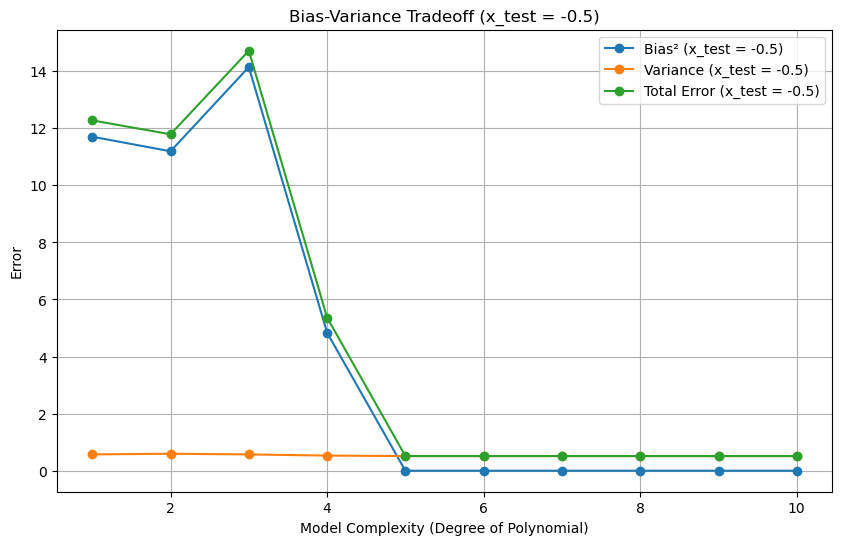

In [486]:
true_value_b = true_function(x_test_b)
for d in tqdm(degrees):
    predictions_b = predictions_per_d_b[d]
    mean_prediction_b = np.mean(predictions_b)
    bias_squared_b.append((mean_prediction_b - true_value_b)**2)
    variance_b.append(np.var(predictions_b))

total_error_b = [b + v for b, v in zip(bias_squared_b, variance_b)]

plt.figure(figsize=(10, 6))
plt.plot(degrees, bias_squared_b, label="Bias² (x_test = -0.5)", marker='o')
plt.plot(degrees, variance_b, label="Variance (x_test = -0.5)", marker='o')
plt.plot(degrees, total_error_b, label="Total Error (x_test = -0.5)", marker='o')
plt.title("Bias-Variance Tradeoff (x_test = -0.5)")
plt.xlabel("Model Complexity (Degree of Polynomial)")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()


In [490]:
df_b = pd.DataFrame({
    'Degree': degrees,
    'Bias^2': bias_squared_b,
    'Variance': variance_b,
    'Total Error': total_error_b})
df_b

,Degree,Bias^2,Variance,Total Error
0,1,11.702824,0.572484,12.275308
1,2,11.192164,0.595376,11.787540
2,3,14.143196,0.572034,14.715230
3,4,4.834945,0.531084,5.366030
4,5,0.000532,0.513563,0.514095
5,6,0.000532,0.513563,0.514095
6,7,0.000532,0.513563,0.514095
7,8,0.000532,0.513563,0.514095
8,9,0.000532,0.513563,0.514095
9,10,0.000532,0.513563,0.514095


<p>
    In x = -0.5 Scenario, bias decreases as the degree increases. This suggests that the model is underfitting at lower degrees and becomes more accurate as the degree increases. Variance is relatively stable and small across all degrees, particularly starting from degree 4 onward.
</p>

### Can you explain why do the plots look like above ? What are the implications ? Can we mitigate any of the issues 
<p>
   Initial Scenario: The Scale of bias and variance is almost same (there is good balance) Although both bias and variance decrease as we go to higher degree model. 
</p>

<p>
    Case a: Here X ranges are wider and Bias is very high for simpler models 
    <ul>
        <li>Takeaway: If range of input increases, simple models exhibit higher bias and variance</li>
        <li>Mitigation:  We may use feature scaling like normalization, so that scale of input doesnt imapct model performance</li>
    </ul>
</p>

<p>
    Case b: Here bias decreases as the polynomial degree increases. 
    <ul>
        <li>Takeaway: Implication: Model has high bias for points outside the range. we should be cautious when making predictions for such points.</li>
        <li>Mitigation: Mitigation: We should ensure that test points lie within or atleast nearby the training data range </li>
    </ul>
</p>

### Regularized parameter derivation

<p>
   Consider the regularized model with n = p (number of predictors same as the number of samples). Consider the special case with X is the diagnol matrix. (i.e. the $i^{th}$ sample point is $(y_i, 0, . . . , 1, . . . , 0)$ (1 in the $i^{th}$ position of X) Assume that the intercept term is 0.(y is centered) 
</p>

<li>Derive the ridge and lasso parameters $w_r$ and $w_l$ in terms of y and the penalty parameter $\lambda$.</li>
<li>In case of lasso you can write the solution in terms of least square solution and the penalty parameter $\lambda$.</li>

#### Create Dataset

In [501]:
# X is diagonal matrix and n = p
n = 100
X = np.eye(100)
print(X)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Y is centered i.e. $\sum y_i = 0$

In [505]:
# Generate n random values for y and subtract mean to make it centered
np.random.seed(42)
y_rand = np.random.randn(n)
y = y_rand - np.mean(y_rand)
print(np.round(sum(y),2))

0.0


### 1. Derive the ridge and lasso parameters $w_r$ and $w_l$ in terms of y and the penalty parameter $\lambda$.

<p>
    Linear Regression Equation: $y = wX + \epsilon$. Since Intercept is 0 which means the $\epsilon$ = 0.
    i.e., $y = wX$ <br>
    <b>Case 1: Using Ridge regularization</b>, <br>
    The loss function can be defined as:
    $ L(w) = \frac{1}{2} \sum_{i=1}^n (w_i X_i - y_i)^2 + \lambda \sum_{i=i}^n (w_{i}^2) $ <br>
    Since, X is a diagonal matrix, the equation becomes $ L(w) = \frac{1}{2} \sum_{i=1}^n (w_i - y_i)^2 + \lambda \sum_{i=i}^n (w_{i}^2) $
    <br><br>
    Minimizing Loss function:
    $ \frac{\partial L(w)}{\partial w_i} = 2(w_i - y) + 2 \lambda w_i = 0 $ <br>
    $\implies w_i(1+\lambda) - y = 0 $  i.e.,  $ w_i = \frac{y}{1+\lambda}$ <br>
    Hence, Ridge parameter in terms of y and penalty parameter $\lambda$ is $ w_r = \frac{y}{1+\lambda}$
</p>

<p>
    <b>Case 2: Using Lasso regularization</b> <br>
    The loss function can be defined as:
    $ L(w) = \frac{1}{2} \sum_{i=1}^n (w_i X_i - y_i)^2 + \lambda \sum_{i=i}^n |w_{i}| $ <br>
    Since, X is a diagonal matrix, the equation becomes $ L(w) = \frac{1}{2} \sum_{i=1}^n (w_i - y_i)^2 + \lambda \sum_{i=i}^n |w_{i}| $
    <br><br>
    Minimizing Loss function:
    $ \frac{\partial L(w)}{\partial w_i} = (w_i - y_i) + \lambda.sign(w_i) = 0 $ (Taking non zero value of $w_i) $ <br>
    for $w_i > 0: w_i = y_i - \lambda$ (It also means $y_i > \lambda$, otherwise it would contradict the initial assumption) <br>
    for $w_i < 0$: 
    $w_i = y_i + \lambda$ (i.e., $-y_i > \lambda$)<br>
    and $w_i = 0$ when $|y_i| \leq \lambda$ <br> <br> <br>
    <b>In terms of least square solution</b> : The least square solution without regularization is $y_{hat} = (X^TX)^{-1}(X^Ty)$ <br>
    Since, X is an identity matrix $X^TX = I$ i.e., $y_{hat} = y$ <br>
    With Lasso regularizer, the loss function is:
    $L(w) = \frac{1}{2} \|y - Xw\|^2 + \lambda \|w\|_1$ <br>
    Using
    $\|y - Xw\|^2 = (y - Xw)^T (y - Xw) = y^T y - 2y^T Xw + w^T X^T Xw $ in the above loss function<br>
    The equation becomes: $L(w) = \frac{1}{2} \left( y^T y - 2y^T Xw + w^T X^T Xw \right) + \lambda \sum_{i=1}^p |w_i|$ <br>
    Minimizing the loss function and solving the equation for 0 to find the minima:
    $\frac{\partial L}{\partial w} = -X^T y + X^T Xw + \lambda \cdot \text{sign}(w)$ <br>
    $\implies -X^T y + X^T Xw + \lambda \cdot \text{sign}(w) = 0$ <br>
    $\implies X^T Xw = X^T y - \lambda \cdot \text{sign}(w)$ <br>
    Hence, Lasso parameter in terms of y and $\lambda$ is: <br>
    $w_l = y_i - \lambda \cdot \text{sign}(w_i), \quad \text{if } |y_i| > \lambda$ <br>
    $w_l = 0, \quad \text{if } |y_i| \leq \lambda$



</p>

In [ ]:
#pip install --upgrade scikit-learn


In [ ]:
pip show scikit-learn


In [ ]:
pip install scikit-learn==1.2.2

### Credit Card Fraud Detection for Imbalanced Dataset

In [3]:
from IPython.display import HTML
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [132]:
data = pd.read_csv('creditcard.csv')
display(HTML(data.head().to_html()))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### EDA

In [193]:
# Number of predictor and total datapoints
rows, columns = data.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 284807 rows and 34 columns.


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 34 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [199]:
# Missing values percentage for various columns
temp = data.isna().sum()
miss_df = dict()
miss_df['Columns'] = temp.index
miss_df['Null_Count'] = temp.values
miss_df = pd.DataFrame(miss_df)
miss_df

,Columns,Null_Count
0,Time,0
1,V1,0
2,V2,0
3,V3,0
4,V4,0
5,V5,0
6,V6,0
7,V7,0
8,V8,0
9,V9,0


In [202]:
# Number of labels in the data and their distribution
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [205]:
fraudelent_trans_per = (492 * 100)/(284315 + 492)
fraudelent_trans_per

0.1727485630620034

<p>Dataset is highly imbalane as there are more data points of class 0 and very less from class 1 i.e., only 0.172% datapoints are of class 1</p>

In [209]:
# using describe function of pandas to get the mean, median and std. deviation of the data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Min
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727,14.046470,29.488841
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,5.835854,17.429521
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,10.000000,14.283333
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,15.000000,29.400000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,19.000000,44.550000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,23.000000,59.983333


In [211]:
#analzying few features

In [215]:
# Analyzing the Amount data
print(f"Min transaction amount is: {data['Amount'].min()}")
print(f"Max transaction amount is: {data['Amount'].max()}")
print(f"Avg {data['Amount'].mean()} and std. dev is {data['Amount'].std()}")

Min transaction amount is: 0.0
Max transaction amount is: 25691.16
Avg 88.34961925093133 and std. dev is 250.1201092402221


In [218]:
#Analyzing Time
data['Time'].max()

172792.0

<p>Time is in minutes. Convert it to show hour and minutes</p>

In [222]:
data['Hour'] = (data['Time'] // 3600 ) % 24
data['Min'] = ((data['Time'] / 3600 ) - (data['Time'] // 3600 )) * 60

<Axes: xlabel='Hour'>

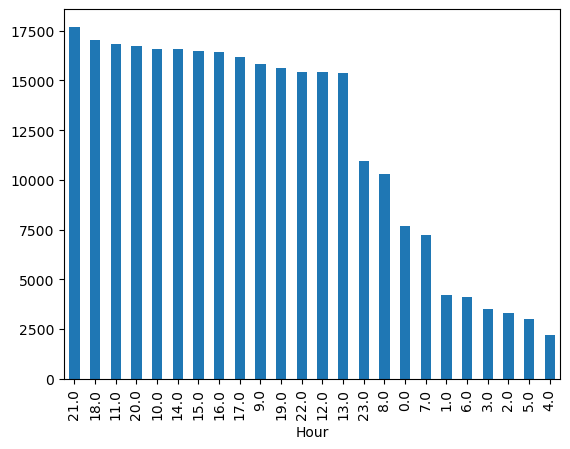

In [225]:
data['Hour'].value_counts().plot(kind='bar')

In [228]:
### Analyzing the realtionship between the Hour of the day and fraudlent transaction
data['Label'] = data['Class'].apply(lambda v: "Fraud" if v == 1 else "Not Fraud")
df_time_fraud = data[['Hour', 'Label']].groupby(['Hour', 'Label']).agg(Count = ('Label', 'count')).reset_index()

In [231]:
data['Label'].value_counts()

Label
Not Fraud    284315
Fraud           492
Name: count, dtype: int64

In [234]:
df_time_fraud.head(2)

,Hour,Label,Count
0,0.0,Fraud,6
1,0.0,Not Fraud,7689


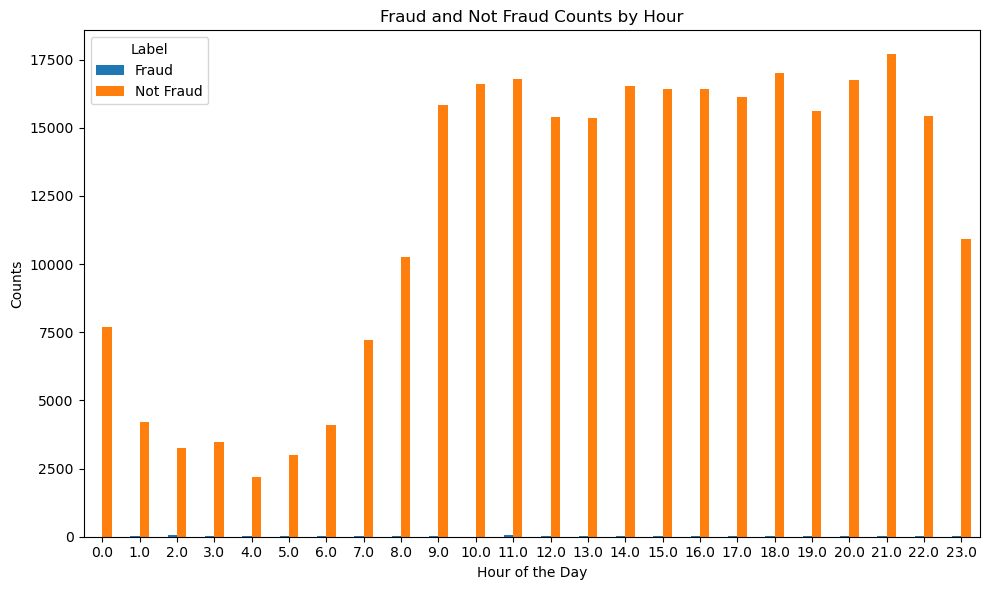

In [237]:
# df_time_fraud_true = df_time_fraud[df_time_fraud['Label']=='Fraud']
# df_time_fraud_False = df_time_fraud[df_time_fraud['Label']=='Not Fraud']
pivot_data = df_time_fraud.pivot(index='Hour', columns='Label', values='Count')
pivot_data.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Counts')
plt.title('Fraud and Not Fraud Counts by Hour')
plt.xticks(rotation=0)
plt.legend(title='Label')
plt.tight_layout()

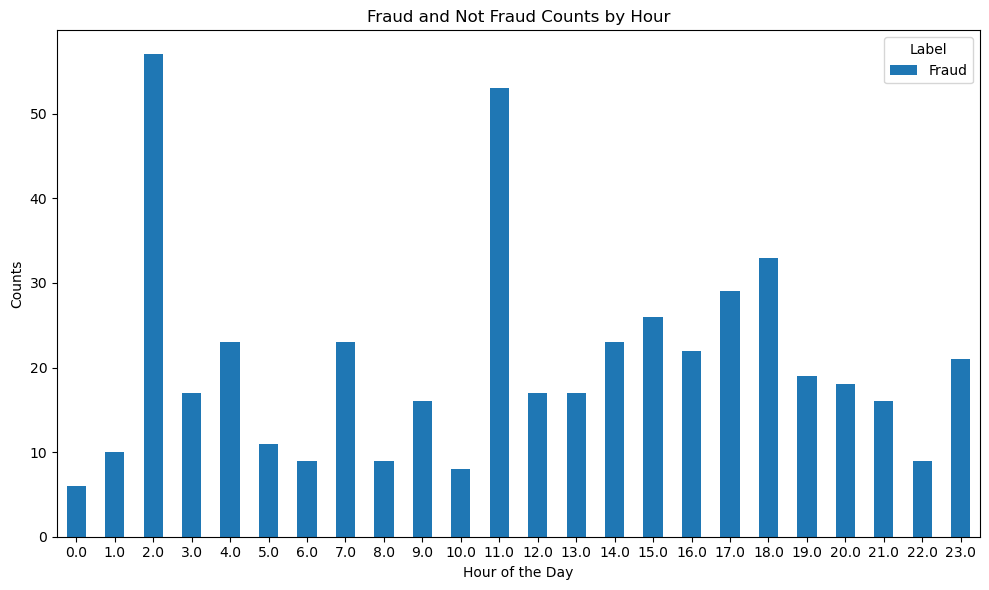

In [240]:
#Only looking at the distribution of the fraudulent transaction with time
df_time_fraud_true = df_time_fraud[df_time_fraud['Label']=='Fraud']
pivot_data = df_time_fraud_true.pivot(index='Hour', columns='Label', values='Count')
pivot_data.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Counts')
plt.title('Fraud and Not Fraud Counts by Hour')
plt.xticks(rotation=0)
plt.legend(title='Label')
plt.tight_layout()

In [243]:
data = data.drop(columns=['Label'])

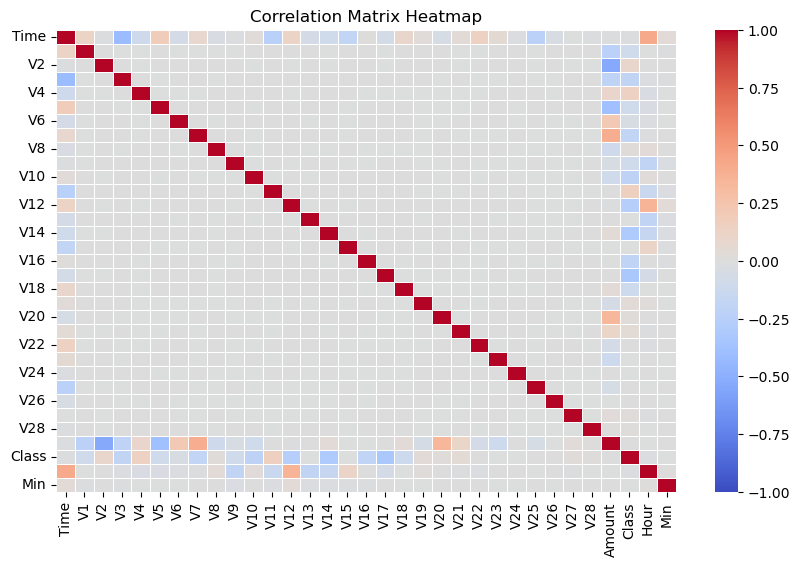

In [246]:
# Chekcing Correlation between the columns
import seaborn as sns
corr_df =data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_df,cmap='coolwarm',vmin=-1,vmax=1,annot=False,linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<p> Columns values have less correlation with each other </p>

### Working with class imbalance:
<p>
    There are multiple ways to handle the class imbalance dataset, some of the famous techniques are under sampling the non event class, oversampling the event class and use SMOTE function to resample the data to balance the class. 
    <br>
    We will use the SMOTE function as it is widely used and the best technique out of all 3 for class imbalance dataset
</p>

In [249]:
data = pd.read_csv('creditcard.csv')

In [252]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [255]:
# Scale the data which will help the model to converge faster
scaler = StandardScaler()
data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']] = scaler.fit_transform(data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']])

# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_new, y_train_new = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", y_train_new.value_counts())


Class distribution after SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [258]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0


### Build the Model

In [356]:
# Train a Logistic Regression model
#1. Without regularizer
Model = LogisticRegression(random_state=42,solver='liblinear')
Model.fit(X_train_new, y_train_new)

# Predict on the test set
y_hat = Model.predict(X_test)
probability = Model.predict_proba(X_test)[:, 1]

#### Classification Matrics (Precision, Racall and ROC-AUC score)

In [360]:
# Classification metrics
print(f"Classification Report: {classification_report(y_test, y_hat)}")

# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, probability))

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC Score: 0.9708176795619767


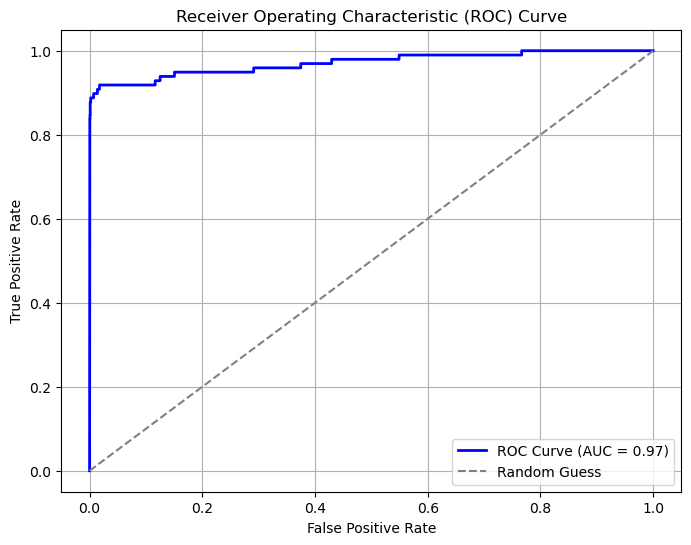

In [363]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probability)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [366]:
# Confusion matrix
confusionMatrix = confusion_matrix(y_test, y_hat)
true_negative, false_positive, false_negative, true_positive = confusionMatrix.ravel()

# Financial loss
false_negative_loss = false_negative * 500
false_positive_loss = false_positive * 10
total_loss = false_negative_loss + false_positive_loss

print(f"Confusion Matrix: {confusionMatrix}")
print(f"False Negative Loss: ${false_negative_loss}")
print(f"False Positive Loss: ${false_positive_loss}")
print(f"Total Financial Loss: ${total_loss}")

Confusion Matrix: [[55399  1465]
 [    8    90]]
False Negative Loss: $4000
False Positive Loss: $14650
Total Financial Loss: $18650


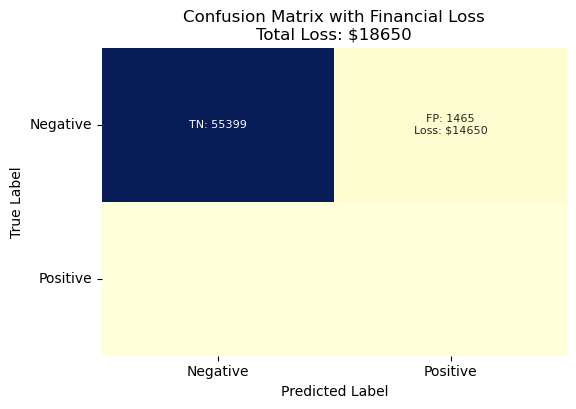

In [369]:
# Add financial losses to confusion matrix as annotations
labels = np.array([
    [f"TN: {true_negative}", f"FP: {false_positive}\nLoss: ${false_positive_loss}"],
    [f"FN: {false_negative}\nLoss: ${false_negative_loss}", f"TP: {true_positive}"]
])

# Plot confusion matrix with annotations
plt.figure(figsize=(6, 4))
sns.heatmap(confusionMatrix, annot=labels, fmt='', cmap="YlGnBu", cbar=False, annot_kws={"size": 8})
plt.title(f"Confusion Matrix with Financial Loss\nTotal Loss: ${total_loss}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"], rotation=0)
plt.yticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"], rotation=0)
plt.show()

### Using Regularizer (l2 = Ridge and l1 = Lasso)

In [373]:
# With Regularizer (Ridge regularizer)
Model_ridge = LogisticRegression(random_state=42,penalty='l2', C=1.0, solver='liblinear')
Model_ridge.fit(X_train_new, y_train_new)

# Predict on the test set
y_hat_ridge = Model_ridge.predict(X_test)
probability_ridge = Model_ridge.predict_proba(X_test)[:, 1]

In [375]:
# Classification metrics
print(f"Classification Report: {classification_report(y_test, y_hat_ridge)}")

# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, probability_ridge))

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC Score: 0.9708176795619767


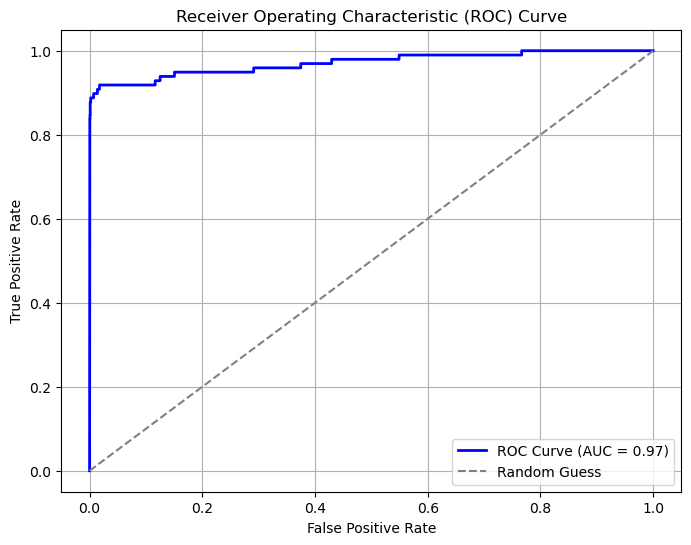

In [377]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probability_ridge)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [382]:
# Confusion matrix
confusionMatrix = confusion_matrix(y_test, y_hat_ridge)
true_negative, false_positive, false_negative, true_positive = confusionMatrix.ravel()

# Financial loss
false_negative_loss = false_negative * 500
false_positive_loss = false_positive * 10
total_loss = false_negative_loss + false_positive_loss

print(f"Confusion Matrix: {confusionMatrix}")
print(f"False Negative Loss: ${false_negative_loss}")
print(f"False Positive Loss: ${false_positive_loss}")
print(f"Total Financial Loss: ${total_loss}")

Confusion Matrix: [[55399  1465]
 [    8    90]]
False Negative Loss: $4000
False Positive Loss: $14650
Total Financial Loss: $18650


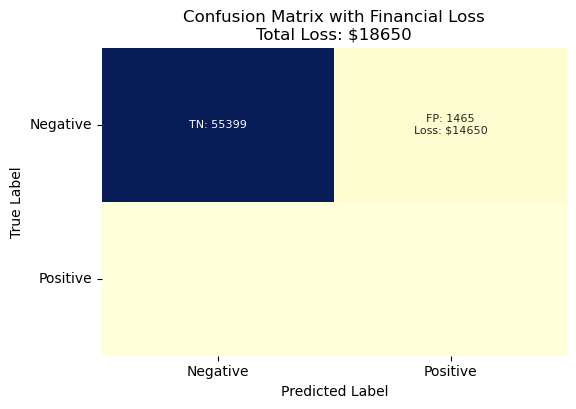

In [385]:
# Add financial losses to confusion matrix as annotations
labels = np.array([
    [f"TN: {true_negative}", f"FP: {false_positive}\nLoss: ${false_positive_loss}"],
    [f"FN: {false_negative}\nLoss: ${false_negative_loss}", f"TP: {true_positive}"]
])

# Plot confusion matrix with annotations
plt.figure(figsize=(6, 4))
sns.heatmap(confusionMatrix, annot=labels, fmt='', cmap="YlGnBu", cbar=False, annot_kws={"size": 8})
plt.title(f"Confusion Matrix with Financial Loss\nTotal Loss: ${total_loss}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"], rotation=0)
plt.yticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"], rotation=0)
plt.show()

In [388]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [391]:
# With Regularizer (Lasso regularizer)
model_lasso = LogisticRegression(random_state=42,penalty='l1', C=1.0, solver='liblinear')
model_lasso.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_hat_lasso = model_lasso.predict(X_test)
probabiliy_lasso = model_lasso.predict_proba(X_test)[:, 1]

In [393]:
# Classification metrics
print(f"Classification Report: {classification_report(y_test, y_hat_lasso)}")

# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, probabiliy_lasso))

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC Score: 0.97072876350878


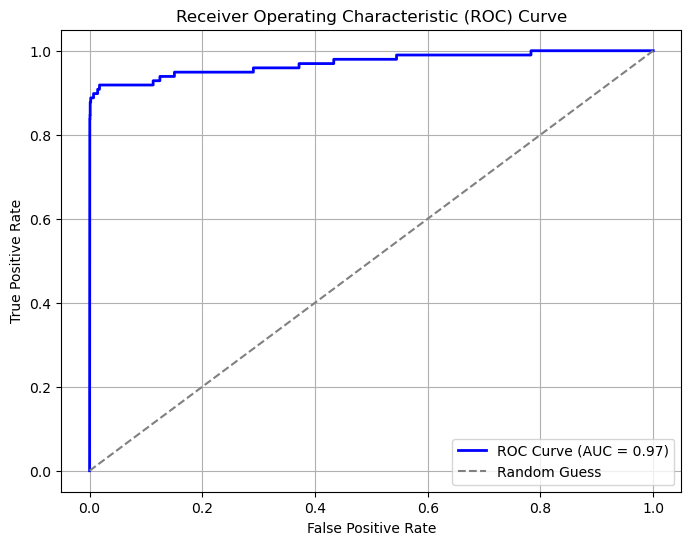

In [397]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabiliy_lasso)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [400]:
# Confusion matrix
confusionMatrix = confusion_matrix(y_test, y_hat_lasso)
true_negative, false_positive, false_negative, true_positive = confusionMatrix.ravel()

# Financial loss
false_negative_loss = false_negative * 500
false_positive_loss = false_positive * 10
total_loss = false_negative_loss + false_positive_loss

print(f"Confusion Matrix: {confusionMatrix}")
print(f"False Negative Loss: ${false_negative_loss}")
print(f"False Positive Loss: ${false_positive_loss}")
print(f"Total Financial Loss: ${total_loss}")

Confusion Matrix: [[55399  1465]
 [    8    90]]
False Negative Loss: $4000
False Positive Loss: $14650
Total Financial Loss: $18650


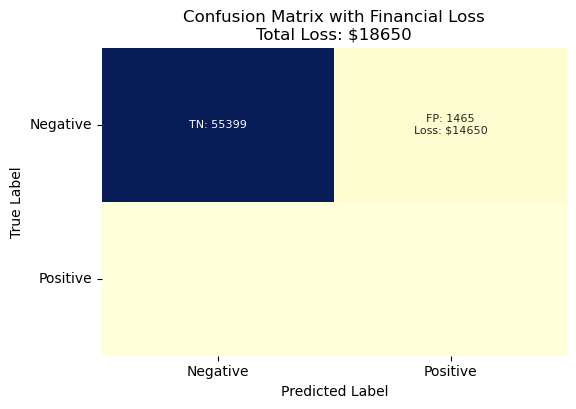

In [403]:
# Add financial losses to confusion matrix as annotations
labels = np.array([
    [f"TN: {true_negative}", f"FP: {false_positive}\nLoss: ${false_positive_loss}"],
    [f"FN: {false_negative}\nLoss: ${false_negative_loss}", f"TP: {true_positive}"]
])

# Plot confusion matrix with annotations
plt.figure(figsize=(6, 4))
sns.heatmap(confusionMatrix, annot=labels, fmt='', cmap="YlGnBu", cbar=False, annot_kws={"size": 8})
plt.title(f"Confusion Matrix with Financial Loss\nTotal Loss: ${total_loss}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"], rotation=0)
plt.yticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"], rotation=0)
plt.show()

<p>Even after using the regularizer the model metrics remains the same. One of the possoble reasons could be we are using a very simplistic model to train a classifier on the credit card fraud data which may have complex relationships between the various columns. Maybe using complex models with regularizer may yield better classifier.</p>

### Classification Threshold Adjustment

In [408]:
# Adjust decision threshold
threshold = [i/100 for i in range(100)]
# print(threshold)
best_loss_adjusted = 10000000000000
best_threshold = 0
for th in tqdm(threshold):
    y_hat_adjusted = (probability >= th).astype(int)

    # Recalculate metrics and loss
    conf_matrix_adjusted = confusion_matrix(y_test, y_hat_adjusted)
    true_negative, false_positive, false_negative, true_positive = conf_matrix_adjusted.ravel()

    false_negative_loss_adjusted = false_negative * 500
    false_positive_loss_adjusted = false_positive * 10
    total_loss_adjusted = false_negative_loss_adjusted + false_positive_loss_adjusted
    if best_loss_adjusted > total_loss_adjusted:
        best_loss_adjusted = total_loss_adjusted
        best_threshold = th

#Final confusion matrix and financial losses with best threshold
print(f"Best throshold value for minimul finacial loss : {best_threshold}")
y_pred_adjusted = (y_hat >= best_threshold).astype(int)

print(f"Adjusted Confusion Matrix: {conf_matrix_adjusted}")
print(f"Adjusted False Negative Loss: ${false_negative_loss_adjusted}")
print(f"Adjusted False Positive Loss: ${false_positive_loss_adjusted}")
print(f"Adjusted Total Financial Loss: ${total_loss_adjusted}")

100%|██████████| 100/100 [00:01<00:00, 58.88it/s]

Best throshold value for minimul finacial loss : 0.98
Adjusted Confusion Matrix: [[56794    70]
 [   12    86]]
Adjusted False Negative Loss: $6000
Adjusted False Positive Loss: $700
Adjusted Total Financial Loss: $6700
